# Final Review

In [1]:
using Random
using Plots
using StatsBase
using GraphRecipes
using LightGraphs

## Dynamic Graphs

In [33]:
function sample_krapivsky_redner(n0, N, m, α=1)
    nodes = collect(1:N)
    G = random_regular_graph(n0, m)
    initial_edges = edges(G)
    G = SimpleGraph(N)
    for edge in initial_edges
        n1, n2 = src(edge), dst(edge)
        add_edge!(G, n1, n2)
    end

    for t=1:N - n0
        n_new = t + n0
        # modified Krapivsky, Redner:
        # probs = ProbabilityWeights(α * degree(G) + [n < t + n0 ? 1 : 0 for n=1:N])
        probs = ProbabilityWeights(degree(G) .^ α)
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
        n_edges = length(edges(G))
    end
    return G
end

function frequency(values)
    freq = Dict{Int64, Int64}()
    for value ∈ values
        if value ∈ keys(freq)
            freq[value] += 1
        else
            freq[value] = 1
        end
    end
    return freq
end


"""
# Barabási-Albert (BA) model

Starting from a complete(n0, m) regular graph, the
BA model add a new node at each iteration and links it with
m other nodes with probability proportional to
their node-degree.
"""
function sample_ab(n0, N, m)
    nodes = collect(1:N)
    
    G = random_regular_graph(n0, m)
    initial_edges = edges(G)
    G = SimpleGraph(N)
    for edge in initial_edges
        n1, n2 = src(edge), dst(edge)
        add_edge!(G, n1, n2)
    end

    for t=1:N-n0
        probs = ProbabilityWeights(degree(G))
        n_new = n0 + t
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
    end
    return G
end


"""
# Uniform Attachment (UA) model

Starting from a complete(n0, m) regular graph,
the UA model attaches a new node at each iteration
and links it with m other nodes with uniform probability
"""
function sample_uniform_attachment(n0, N, m)
    nodes = collect(1:N)
    G = random_regular_graph(n0, m)
    initial_edges = edges(G)
    G = SimpleGraph(N)
    for edge in initial_edges
        n1, n2 = src(edge), dst(edge)
        add_edge!(G, n1, n2)
    end

    for t=1:N-n0
        probs = [ones(n0 + t); zeros(N - (n0 + t))]
        probs = ProbabilityWeights(probs)
        n_new = n0 + t
        for n_connect in sample(nodes, probs, m, replace=false)
            add_edge!(G, n_new, n_connect)
        end
    end
    return G
end

sample_uniform_attachment

### Barabasi-Albert model

In [3]:
n0, N, m = 6, 10_000, 2
G = sample_ab(n0, N, m)
mean(degree(G))

3.9988

In the BA model, the stationary solution $p_k$, as $t\to\infty$ is given by 
$$
    p_k = \frac{2m(m+1)}{k(k+1)(k+2)}
$$

In the following cell, we compare the theoretical result v.s. an empirical result (for large $N$).

In [4]:
p(k) = 2m * (m + 1) / (k * (k + 1) * (k + 2))

n̂kt = frequency(degree(G))
kmax = maximum(keys(n̂kt))

k_vals = 2:kmax
true_probs = p.(k_vals)
true_probs = Dict(zip(k_vals, true_probs))


pk = Dict(key => (value/N, round(true_probs[key], digits=4)) for (key, value) in n̂kt if key!=0)
sort(collect(pk))

69-element Array{Pair{Int64,Tuple{Float64,Float64}},1}:
   2 => (0.501, 0.5)
   3 => (0.1962, 0.2)
   4 => (0.1026, 0.1)
   5 => (0.0551, 0.0571)
   6 => (0.0387, 0.0357)
   7 => (0.0232, 0.0238)
   8 => (0.0182, 0.0167)
   9 => (0.013, 0.0121)
  10 => (0.0078, 0.0091)
  11 => (0.0066, 0.007)
  12 => (0.0052, 0.0055)
  13 => (0.0045, 0.0044)
  14 => (0.0041, 0.0036)
     ⋮
  73 => (0.0001, 0.0)
  77 => (0.0002, 0.0)
  79 => (0.0002, 0.0)
  85 => (0.0001, 0.0)
  87 => (0.0001, 0.0)
  94 => (0.0001, 0.0)
 100 => (0.0001, 0.0)
 130 => (0.0001, 0.0)
 141 => (0.0001, 0.0)
 145 => (0.0001, 0.0)
 163 => (0.0001, 0.0)
 247 => (0.0001, 0.0)

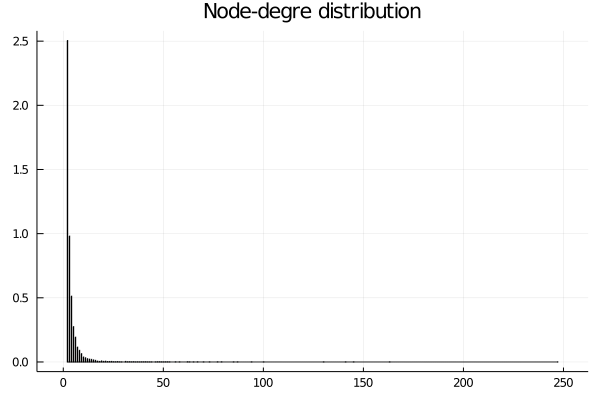

In [5]:
histogram(degree(G), normalize=true, label=nothing, title="Node-degre distribution")

### Uniform attachment

In the Uniform Attachment model, the stationary solution $p_k$, as $t\to\infty$ is given by 

$$
    p_k = \left(\frac{m}{m+1}\right)^{k-m} \frac{1}{m+1}
$$

In [6]:
n0, N, m = 6, 10_000, 2
G = sample_uniform_attachment(n0, N, m)
mean(degree(G))

3.9973

In [7]:
p(k) = (m / (m + 1)) ^ (k - m) / (m + 1)

n̂kt = frequency(degree(G))
kmax = maximum(keys(n̂kt))
k_vals = 2:100
true_probs = p.(k_vals)
true_probs = Dict(zip(k_vals, true_probs))

pk = Dict(key => (value/N, round(true_probs[key], digits=4)) for (key, value) in n̂kt if key!=0)
sort(collect(pk))

23-element Array{Pair{Int64,Tuple{Float64,Float64}},1}:
  2 => (0.332, 0.3333)
  3 => (0.2227, 0.2222)
  4 => (0.149, 0.1481)
  5 => (0.0965, 0.0988)
  6 => (0.0669, 0.0658)
  7 => (0.0437, 0.0439)
  8 => (0.0323, 0.0293)
  9 => (0.0208, 0.0195)
 10 => (0.0119, 0.013)
 11 => (0.0074, 0.0087)
 12 => (0.0058, 0.0058)
 13 => (0.0041, 0.0039)
 14 => (0.0023, 0.0026)
 15 => (0.0015, 0.0017)
 16 => (0.0008, 0.0011)
 17 => (0.0008, 0.0008)
 18 => (0.0006, 0.0005)
 19 => (0.0004, 0.0003)
 20 => (0.0001, 0.0002)
 21 => (0.0001, 0.0002)
 22 => (0.0001, 0.0001)
 23 => (0.0001, 0.0001)
 24 => (0.0001, 0.0)

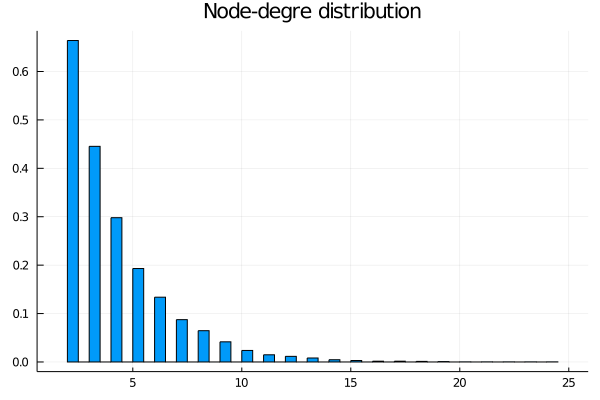

In [8]:
histogram(degree(G), normalize=true, label=nothing, title="Node-degre distribution")

In [9]:
p_ba(k) = 2m * (m + 1) / (k * (k + 1) * (k + 2))
p_uniform(k) = (m / (m + 1)) ^ (k - m) / (m + 1)

p_uniform (generic function with 1 method)

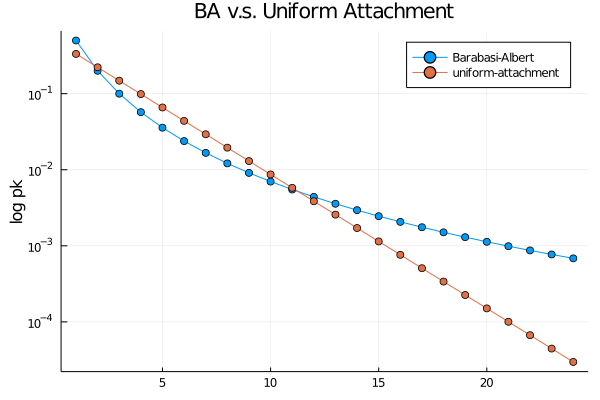

In [10]:
krange = 2:25
plot(p_ba.(krange), marker=true, label="Barabasi-Albert", yaxis=:log)
plot!(p_uniform.(krange), marker=true, label="uniform-attachment", yaxis=:log)
plot!(title="BA v.s. Uniform Attachment", ylabel="log pk")

### Krapivsky, Redner, Leyvraz model

In [38]:
n0, N, m = 6, 10_000, 2
G1 = sample_krapivsky_redner(n0, N, m, 1)
G2 = sample_krapivsky_redner(n0, N, m, 0)
mean(degree(G))

3.9988

In [ ]:
α_vals = [0 0.3 1 1.2]
figures = []
for α in α_vals
    G = sample_krapivsky_redner(n0, N, m, α)
    fig = histogram(degree(G), normalize=true, label=nothing, title="α=$α")
    push!(figures, fig)
end

In [ ]:
l = @layout[a b; c d]
plot(figures..., layout=l)